# Exploratory data analysis

 <font size="3">Import libraries</font>


In [1]:
# import standard libraries
import json
import numpy as np
# import third-party libraries
from geopy.geocoders import Nominatim
import matplotlib
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from IPython.display import display
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# import local libraries

pd.options.display.max_columns = None

<font size="3">Import data</font>

In [2]:
movies = pd.read_csv('movies_metadata_cleaned.csv')

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,6,12,30,32,60,62,64,66,68,70,72,74,76,78,80,82,84,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<font size="3">We observe that there are a lot of columns. This is because some movies have long listings of either genres, production companies, production countries, or spoken languages</font>

In [3]:
movies

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

In [4]:
# number of movies at the beginning
start_num_rows = np.shape(movies)[0]
start_num_cols = np.shape(movies)[1]
print('Our dataset has {} entries and {} columns'.format(start_num_rows, start_num_cols))

Our dataset has 45466 entries and 173 columns


<font size="3">The tremendous number of columns come from the initial cleaning of the dataset, where we have expanded cells that had more than one possible value.</font>

## Further cleaning

In [5]:
# make sure 'adult' column only has True or False
unique_adult = list(movies['adult'].unique())
print('Unique values in \'adult\' columns:')
for elt in unique_adult:
    print('> {} (type {})'.format(elt, type(elt)))
# there are some inconsistencies (some long strings and stringified booleans)
adult_todrop = [elt for elt in unique_adult if elt != False and elt != True and elt != 'False' and elt != 'True']

Unique values in 'adult' columns:
> False (type <class 'bool'>)
> False (type <class 'str'>)
> True (type <class 'str'>)
>  - Written by Ørnås (type <class 'str'>)
>  Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all. (type <class 'str'>)
>  Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche. (type <class 'str'>)
> True (type <class 'bool'>)


In [6]:
# take a look at strange rows in unique_adult
adult_todrop = movies[movies['adult'].isin(adult_todrop)]
adult_todrop

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We observe that the above rows are pretty weird. We drop them.</font>

In [7]:
movies = movies.drop(index = adult_todrop.index)

<font size="3">We transform the imdb_id column.</font>

In [8]:
display(movies[['imdb_id']].head())
movies['imdb_id'] = movies['imdb_id'].str.strip('tt0') # strip all leading tt and 0s

,imdb_id
0,tt0114709
1,tt0113497
2,tt0113228
3,tt0114885
4,tt0113041


<font size="3">We continue by converting columns to check for more inconsitencies or errors in the data.</font>

In [9]:
# convert 'adult' column to bool
movies['adult'] = movies['adult'].astype(bool) # runs without errors
# convert all columns representing ids to int
col_id = movies.filter(regex = '_.*id').columns
movies[col_id] = movies[col_id].fillna(value = -1) # workaround since nans cannot be converted to integers
movies[col_id] = movies[col_id].astype(int) # runs without errors
# convert some columns to float'
col_float = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
movies[col_float] = movies[col_float].astype(float) # runs without errors
# convert 'video' column to bool
movies['video'] = movies['video'].astype(bool) # runs without errors
# convert 'release_date' column to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

<font size="3">We then analyse the nans in each columns</font>

In [10]:
nulls = movies.iloc[:, 0:15].isnull().sum(axis = 0)
display(pd.DataFrame(nulls).T)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,0,0,0,0,11,0,3,87,3,260,84,3,0,3,3


In [11]:
todrop = movies[movies['popularity'].isnull()] # these rows are too incomplete, we drop them
display(todrop)
movies = movies.drop(index = todrop.index)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We have enough data to drop some rows that have incomplete data in the first columns (adult ~ vote_count)</font>

In [12]:
nulls_todrop = nulls[nulls.between(1, max(nulls))].index
for col in nulls_todrop:
    todrop = movies[movies[col].isnull()]
    movies = movies.drop(index = todrop.index)
print('Our dataset now has {} entries compared to {} in the beginning.'.format(len(movies), start_num_rows))

Our dataset now has 45043 entries compared to 45466 in the beginning.


In [13]:
# Convert boolean columns to integers (False = 0, True = 1)
bool_col = movies.dtypes[movies.dtypes == 'bool'].index
movies[bool_col] = movies[bool_col].astype(int)

In [14]:
# replace release date by the year and month, we don't care about the day
movies['release_year'] = pd.DatetimeIndex(movies['release_date']).year
movies['release_year'] = movies['release_year'].astype('int')
movies['release_month'] = pd.DatetimeIndex(movies['release_date']).month
movies['release_month'] = movies['release_month'].astype('int')
# drop release date
movies = movies.drop(columns = 'release_date')

In [15]:
# count number of possibilities of status
print(movies['status'].value_counts())
# Rumored, post production, in production and planned movies can be removed as they only 
# represent a small fraction of all movies. We keep only released
movies = movies[movies['status'] == 'Released']

Released           44686
Rumored              229
Post Production       97
In Production         17
Planned               13
Canceled               1
Name: status, dtype: int64


<font size="3">Indeed, this is a good assumption. Movies like Avatar 2 who are in production do not have sufficient data in terms of revenue and budget to actually be usefull.</font>

In [16]:
# we drop status column
movies = movies.drop(columns = 'status')

In [17]:
# add return on investment (roi) unnormalized
movies['roi'] = movies['revenue'].divide(movies['budget'])
inf_roi = movies[movies['roi'] == np.inf]
movies = movies.drop(index = inf_roi.index)
inf_roi

,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_i

<font size="3">There are more than 2000 movies with a return on investment of infinity. A lot of these movies (Father of the Bride Part II, Revenge of the Pink Panther, Baash) actually have a nonnegative budget according to Wikipedia. We need to drop these rows.</font>

In [18]:
# 
high_roi = movies[movies['roi'] > 5e3]
movies = movies.drop(index = high_roi.index)
high_roi

,adult,budget,id,imdb_id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_i

<font size="3">There are 9 movies with particularly high ROI. Indeed when we check the budget of some of these movies on Wikipedia, they are wrong. These rows need to be dropped. </font>

In [19]:
# some roi are nan, these are 0/0 division, we replace by 0
movies['roi'] = movies['roi'].fillna(0)

In [20]:
# normalise revenue and budget according to highest-grossing, higest budget respectively every year
# 2 new columns to be added
# do the same according to mean-grossing, mean budget
movies['revenue_norm_max'] = np.nan
movies['budget_norm_max'] = np.nan
movies['revenue_norm_mean'] = np.nan
movies['budget_norm_mean'] = np.nan
for year, df in movies.groupby('release_year'):
    movies['revenue_norm_max'].update(df['revenue']/df['revenue'].max())
    movies['budget_norm_max'].update(df['budget']/df['budget'].max())
    movies['revenue_norm_mean'].update(df['revenue']/df['revenue'].mean())
    movies['budget_norm_mean'].update(df['budget']/df['budget'].mean())
# sometimes we divide by 0 (0 max or 0 mean). Fillna with 1 
movies['revenue_norm_max'] = movies['revenue_norm_max'].fillna(1)
movies['budget_norm_max'] = movies['budget_norm_max'].fillna(1)
movies['revenue_norm_mean'] = movies['revenue_norm_mean'].fillna(1)
movies['budget_norm_mean'] = movies['budget_norm_mean'].fillna(1)

In [21]:
# we also drop the IMDB id column
movies = movies.drop(columns = 'imdb_id')

# Info of dataset (no data dropping below this point!)

In [22]:
to_describe = movies.drop(columns = movies.filter(regex = 'genres|production|language|collection|title|id').columns)
to_describe.describe()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,roi,revenue_norm_max,budget_norm_max,revenue_norm_mean,budget_norm_mean
count,42664.000000,4.266400e+04,42664.000000,4.266400e+04,42664.000000,42664.000000,42664.000000,42664.000000,42664.000000,42664.000000,42664.000000,42664.000000,42664.000000,42664.000000
mean,0.273298,4.499566e+06,2.853419,1.138202e+07,93.954950,5.619065,112.166581,1991.440043,6.457388,0.865582,0.022445,0.035358,1.000000,1.000000
std,0.445658,1.795202e+07,6.092939,6.617391e+07,38.942999,1.916352,505.858827,24.396676,3.635363,25.080187,0.117153,0.128752,5.829724,4.018651
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.381111,0.000000e+00,85.000000,5.000000,3.000000,1977.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,1.090493,0.000000e+00,94.000000,6.000000,9.000000,2001.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000e+00,3.424884,0.000000e+00,106.000000,6.800000,32.000000,2010.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2017.000000,12.000000,4133.333333,1.000000,1.000000,186.220764,149.977867


<font size="3">Unusual data: popularity with quantiles low with at least one outlier (max at 547). Same thing for runtime (one movie lasts 21 hours!). For the revenue and budget columns, the 25 to 75% perentiles are close to 0, this is because there are A LOT of movies that have no budget and/or generated no revenue.</font>

In [23]:
max_popularity = movies.sort_values('popularity', ascending = False)
max_popularity.head() # actually the popularity seems normal

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1

In [24]:
max_runtime = movies.sort_values('runtime', ascending = False)
max_runtime.head() # actually the runtime is also normal, Centennial is actually a very lengthy miniseries!

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1

In [25]:
max_votecount = movies.sort_values('vote_count', ascending = False)
max_votecount.head() # vote count seems normal as well ! 

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1

<font size="3">Usual data: Release year seems normal with first movie to be present in 1874 according to our dataset. Moreoever, release months are pretty well distributed (there is no sign that one period is more favorable to release a movie). Adult is between 0 and 1. Vote average seems to range from 0 to 10. Highest budget seems normal. According to Wikipedia, the most expensive movie produced was Pirates of the Caribbean: On Stranger Tides. This coincides with our dataset.</font>

In [26]:
max_budget = movies.sort_values('budget', ascending = False)
max_budget.head()

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1

In [27]:
max_revenue = movies.sort_values('revenue', ascending = False)
max_revenue.head() # seems normal as well, Avatar, Start Wars, and Titanic are the movies with the most revenue
# as of whatever year this dataset was released. Today, the highest-grossing movie is The Avengers and not Avatar 
# anymore.

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1

In [28]:
max_runtime = movies.sort_values('release_year', ascending = True)
max_runtime.head()

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1

## Analysis of genres

In [29]:
# we can drop the id of genres and re-econde later
genres_id = movies.filter(regex = 'genres_id_.*')
movies = movies.drop(columns = genres_id.columns)

In [30]:
# identify movies without a genre
nulls = movies.filter(regex = 'genres_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a genre. Can we can drop them.?'.format(nulls[0]))
# movies = movies[movies['genres_name_0'].notna()]

There are 2250 movies without a genre. Can we can drop them.?


In [31]:
# let's see how many genres movies have on average
genres_name = movies.filter(regex = 'genres_name_.*')
avg_genres = genres_name.count(axis = 1).mean()
print('Number of genres on average over all movies: {}'.format(avg_genres))

Number of genres on average over all movies: 2.004875304706544


In [32]:
# we identify all possible values for genres
genres_name = movies.filter(regex = 'genres_name_.*')
genres_name_stacked = genres_name.stack().reset_index(drop = True)
genres_name_unique = genres_name_stacked.drop_duplicates().reset_index(drop = True)
display(pd.DataFrame(genres_name_unique).T)
print('There are {} different genres'.format(len(genres_name_unique)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Documentary,Music,Western,TV Movie


There are 20 different genres


In [33]:
# distribution of genres
genres_name_stacked.value_counts()

Drama              18921
Comedy             12237
Thriller            7193
Romance             6231
Action              6214
Horror              4482
Crime               4052
Documentary         3688
Adventure           3306
Science Fiction     2894
Family              2585
Mystery             2343
Fantasy             2165
Animation           1818
Foreign             1537
Music               1512
History             1327
War                 1273
Western             1009
TV Movie             749
dtype: int64

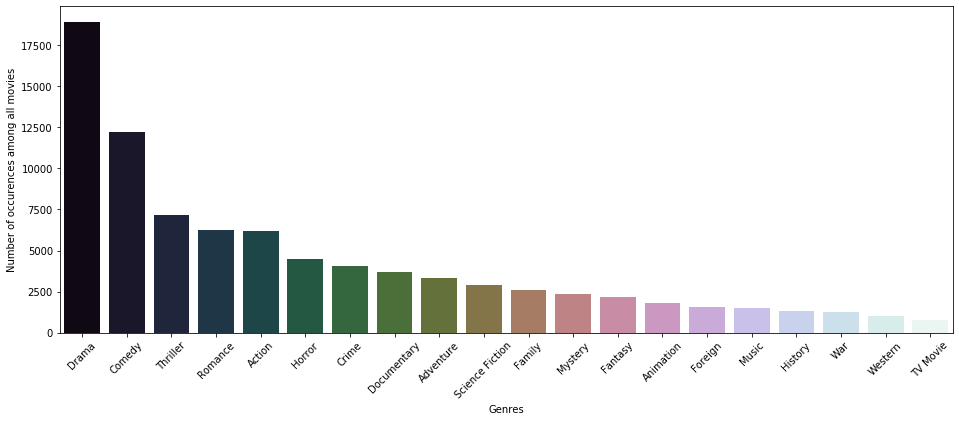

In [34]:
fig, ax = plt.subplots(figsize = (16, 6))
genres_palette = sns.color_palette('cubehelix', len(genres_name_unique))
g = sns.countplot(genres_name_stacked, ax = ax, order = genres_name_stacked.value_counts().index,
                 palette = genres_palette)
ax.set(xlabel = 'Genres', ylabel = 'Number of occurences among all movies')
_ = plt.xticks(rotation = 45)

In [35]:
# we add a column of genres per movie as a weight, the more the movie has popular genres, the higher 
# the weighted value (in terms of genres) of the movie
# compute weights
genres_weight = genres_name_stacked.value_counts(normalize = True)
genres_name_weighted = genres_name.replace(genres_weight)
movies['genres_weight'] = genres_name_weighted.sum(axis = 1)

2250 movies have 0 genres
13713 movies have 1 genres
13562 movies have 2 genres
9019 movies have 3 genres
3160 movies have 4 genres
787 movies have 5 genres
147 movies have 6 genres
23 movies have 7 genres
3 movies have 8 genres


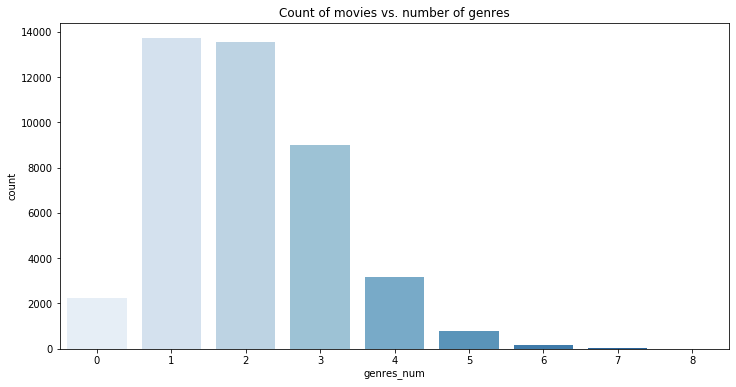

In [36]:
# we also add column with number of genres for each movie
genres_name = movies.filter(regex = 'genres_name_.*')
movies['genres_num'] = genres_name.count(axis = 1)
for i, c in movies['genres_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} genres'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['genres_num'], 
                  palette = sns.color_palette("Blues", len(movies['genres_num'].value_counts())))
_ = ax.set_title('Count of movies vs. number of genres')

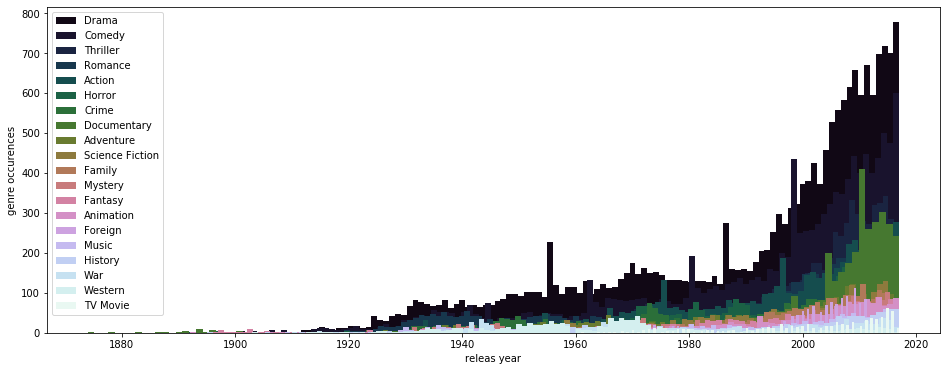

In [37]:
# plot some data on genres
fig, ax = plt.subplots(figsize = (16, 6))
genres_name_year = movies.filter(regex = '(genres_name_.*)|release_year') 
genres_name = movies.filter(regex = 'genres_name_.*')
for i, genre in enumerate(genres_name_stacked.value_counts().index):
    temp = genres_name_year[(genres_name_year[genres_name.columns] == genre).any(axis = 1)]
    ax.hist(temp['release_year'], 120, stacked = True, color = genres_palette[i], label = genre,
            range = (temp['release_year'].min(), temp['release_year'].max()))
_ = plt.legend()
_ = ax.set_xlabel('releas year')
_ = ax.set_ylabel('genre occurences')

<font size="3">We observe that all genres have gained popularity over the years except maybe War and Western genres which have decreased and had a peak of popularity after World War 2. We also see that simply more movies are being produced as time increase.</font>

## Analysis of production companies

In [38]:
# we can drop the id of production companies and re-econde later
company_id = movies.filter(regex = 'production_companies_id_.*')
movies = movies.drop(columns = company_id.columns)

In [39]:
# identify movies without a production company
nulls = movies.filter(regex = 'production_companies_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a production company. Can we drop them?'.format(nulls[0]))

There are 11175 movies without a production company. Can we drop them?


In [40]:
# let's see how many production companies movies have on average
company_name = movies.filter(regex = 'production_companies_name_.*')
avg_company = company_name.count(axis = 1).mean()
print('Number of production companies on average over all movies: {}'.format(avg_company))

Number of production companies on average over all movies: 1.5329083067691731


In [41]:
# we identify all possible values for production companies
company_name = movies.filter(regex = 'production_companies_name_.*')
company_name_stacked = company_name.stack().reset_index(drop = True)
company_name_unique = company_name_stacked.drop_duplicates().reset_index(drop = True)
print('There are {} different production companies!'.format(len(company_name_unique)))

There are 22479 different production companies!


In [42]:
# get most popular production companies
num_most_popular = 30
print('{} most popular production companies (values: produced films)'.format(num_most_popular))
pd.DataFrame(company_name_stacked.value_counts()[:num_most_popular])

30 most popular production companies (values: produced films)


,0
Warner Bros.,1174
Metro-Goldwyn-Mayer (MGM),1032
Paramount Pictures,942
Twentieth Century Fox Film Corporation,788
Universal Pictures,750
Columbia Pictures Corporation,423
Columbia Pictures,403
Canal+,395
RKO Radio Pictures,288
United Artists,261


<font size="3">We see that some companies appear two times (Walt Disney Productions and Walt Disney Pictures). Is this a rebranding factor or really two studios? Moreover, we saw that Pixar Animation Studios appeared in the beginning of the EDA. They are now a subsidiary of Walt Disney Studios and were part of Lucas Film in the past (which is also now part of Walt Disney). We are not more informed on how production companies are counted for each movie over the time horizon.</font>

[Text(0, 0.5, 'Number of occurences among all movies'),
 Text(0.5, 0, 'Genres'),
 Text(0.5, 1.0, 'Warner Bros.')]

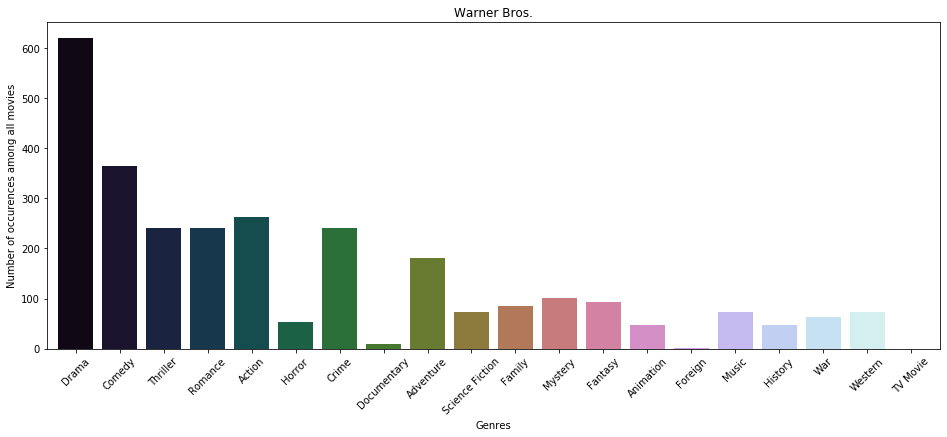

In [43]:
# plot some data on production companies (change company index)
fig, ax = plt.subplots(figsize = (16, 6))
company_index = 0
this_company = company_name_stacked.value_counts().index[0]
genres_company = movies.filter(regex = '(genres_name_.*)|(production_companies_name_.*)')
company_name = movies.filter(regex = 'production_companies_name_.*')
genres_name = movies.filter(regex = 'genres_name_.*')
genres_this_company = genres_company[(genres_company[company_name.columns] == this_company).any(axis = 1)]
genres_this_company = genres_this_company[genres_name.columns]
genres_count = pd.Series(index = genres_name_stacked.value_counts().index, data = 0)
for col in genres_this_company:
    temp = genres_this_company[col].value_counts()
    genres_count = pd.concat([genres_count, temp], axis = 1)
genres_count = genres_count.sum(axis = 1)
genres_count.plot.bar(genres_count, ax = ax, color = genres_palette, rot = 45, width = 0.8)
ax.set(xlabel = 'Genres', ylabel = 'Number of occurences among all movies', title = this_company)

<font size="3">The most popular companies seems to follow the general trend, which is normal since they are the ones to create the trend. Production companies such as Arte (around index 100) is an outlier of the trend with noticeable amount of documenaries.</font>

11175 movies have 0 production companies
15785 movies have 1 production companies
7403 movies have 2 production companies
4336 movies have 3 production companies
1787 movies have 4 production companies
878 movies have 5 production companies
525 movies have 6 production companies
281 movies have 7 production companies
159 movies have 8 production companies
119 movies have 9 production companies
64 movies have 10 production companies
35 movies have 11 production companies
32 movies have 12 production companies
17 movies have 13 production companies
15 movies have 14 production companies
6 movies have 15 production companies
18 movies have 16 production companies
7 movies have 17 production companies
2 movies have 18 production companies
5 movies have 19 production companies
4 movies have 20 production companies
4 movies have 21 production companies
2 movies have 22 production companies
1 movies have 24 production companies
1 movies have 25 production companies
3 movies have 26 production

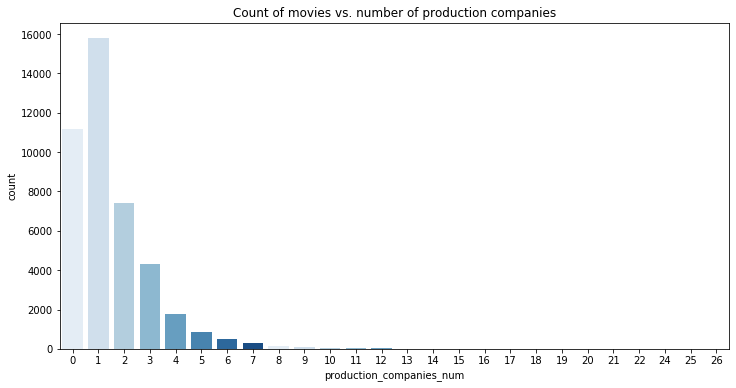

In [44]:
# we add column with number of production companies for each movie
company_name = movies.filter(regex = 'production_companies_name_.*')
movies['production_companies_num'] = company_name.count(axis = 1)
for i, c in movies['production_companies_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} production companies'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['production_companies_num'], 
                  palette = sns.color_palette("Blues", 8))
_ = ax.set_title('Count of movies vs. number of production companies')

In [45]:
# add column with weighted production companies
company_name = movies.filter(regex = 'production_companies_name_.*')
company_name_stacked = company_name.stack().reset_index(drop = True)
company_weight = company_name_stacked.value_counts(normalize = True)
company_name_weighted = company_name.replace(company_weight)
movies['production_companies_weight'] = company_name_weighted.sum(axis = 1)

In [46]:
# print some interesting information
max_company = movies[movies['production_companies_num'] == movies['production_companies_num'].max()]
print('There are {} movies with {} production companies!'.format(len(max_company), 
                                                                 movies['production_companies_num'].max()))
max_company

There are 3 movies with 26 production companies!


,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_name_0,genres_name_1,genres_name_2,genres_name_3,genres_name_4,genres_name_5,genres_name_6,genres_name_7,production_companies_name_0,production_companies_name_1,production_companies_name_2,production_companies_name_3,production_companies_name_4,production_companies_name_5,production_companies_name_6,production_companies_name_7,production_companies_name_8,production_companies_name_9,production_companies_name_10,production_companies_name_11,production_companies_name_12,production_companies_name_13,production_companies_name_14,production_companies_name_15,production_companies_name_16,production_companies_name_17,production_companies_name_18,production_companies_name_19,production_companies_name_20,production_companies_name_21,production_companies_name_22,production_companies_name_23,production_companies_name_24,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1_11,spoken_languages_name_11,spoken_languages_iso_639_1_12,spoken_languages_name_12,spoken_languages_iso_639_1_13,spoken_languages_name_13,spoken_languages_iso_639_1_14,spoken_languages_name_14,spoken_languages_iso_639_1_15,spoken_languages_name_15,spoken_languages_iso_639_1_16,spoken_languages_name_16,spoken_languages_iso_639_1_17,spoken_languages_name_17,spoken_languages_iso_639_1_18,spoken_languages_name_18,release_year,release_month,roi,revenue_norm_max,budget_norm_max,revenue_norm_mean,budget_norm_mean,genres_weight,genres_num,production_companies_num,production_companies_weight
3786,0,12800000.0,16,en,Dancer in the Dark,10.684806,40031879.0,140.0,Dancer in the Dark,0,7.7,392.0,498,Heart of Gold Collection,Drama,Crime,Music,NaN,NaN,NaN,NaN,NaN,Fine Line Features,Zentropa E

<font size="3">These movies seem to be European collaborations that group various countries and various production companies.</font>

## Analysis of production countries

In [47]:
# we can drop the iso certification name of production countries and re-econde later
country_iso = movies.filter(regex = 'production_countries_iso_.*')
movies = movies.drop(columns = country_iso.columns)

In [48]:
# identify movies without a production country
nulls = movies.filter(regex = 'production_countries_name_.*').isnull().sum(axis = 0)
print('There are {} movies without a production country. Can we can drop them?'.format(nulls[0]))

There are 5892 movies without a production country. Can we can drop them?


In [49]:
# let's see how many production countries movies have on average
country_name = movies.filter(regex = 'production_countries_name_.*')
avg_country = country_name.count(axis = 1).mean()
print('Number of production countries on average over all movies: {}'.format(avg_country))

Number of production countries on average over all movies: 1.0851303206450402


In [50]:
# we identify all possible values for production countries
country_name = movies.filter(regex = 'production_countries_name_.*')
country_name_stacked = country_name.stack().reset_index(drop = True)
country_name_unique = country_name_stacked.drop_duplicates().reset_index(drop = True)
print('There are {} different production countries!'.format(len(country_name_unique)))

There are 160 different production countries!


In [51]:
# get most popular production countries
num_most_popular = 10
print('{} most popular production countries (values: produced films)'.format(num_most_popular))
country_name_value_counts = country_name_stacked.value_counts()
country_name_value_counts_norm = country_name_stacked.value_counts()/sum(country_name_value_counts)
pd.DataFrame(country_name_value_counts[:num_most_popular])

10 most popular production countries (values: produced films)


,0
United States of America,19767
United Kingdom,3819
France,3676
Germany,2110
Italy,2066
Canada,1654
Japan,1567
Spain,875
Russia,851
India,782


<font size="3">As one could guess, the most popular production countries are the USA, UK, and France, among other big nations. </font>

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


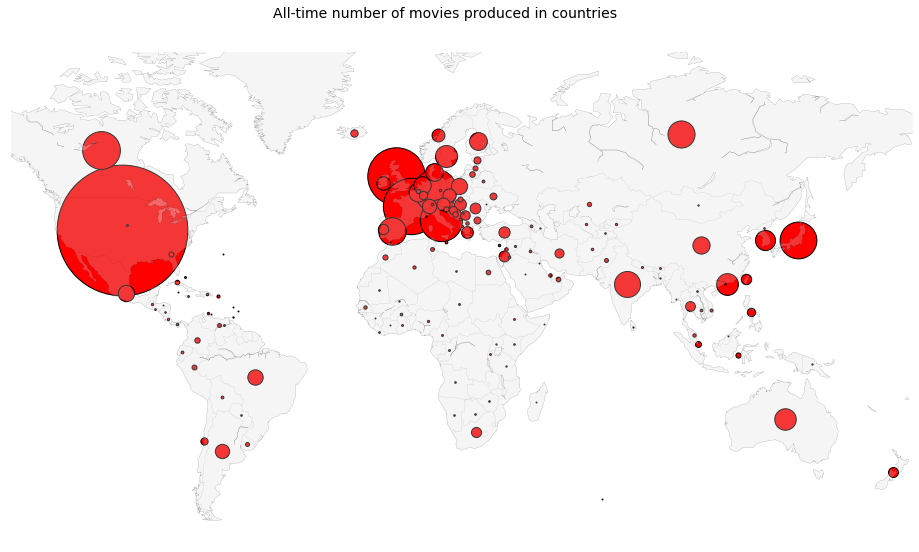

In [52]:
# plot map with number of movies produced
fig, ax = plt.subplots(figsize = (18, 9))
fig.suptitle('All-time number of movies produced in countries', fontsize = 14, y = 0.95)

m = Basemap(projection = 'mill', llcrnrlon = -140, llcrnrlat = -60, urcrnrlon = 180, urcrnrlat = 80, 
            resolution = 'c')

m.drawmapboundary(fill_color = '#ffffff', linewidth = 0, ax = ax)
m.fillcontinents(color = '#dbdbdb', alpha = 0.25, lake_color = '#ffffff')
m.drawcoastlines(linewidth = 0.1, color = "black")
m.drawcountries(linewidth = 0.05, color = 'black')

# read gps coordinates first
with open('gps_coordinates.json') as f:
    gps_coordinates = json.load(f)

# get gps coordinates of countries
geolocator = Nominatim(user_agent = 'my_app/0,1', timeout = 10)
for country in country_name_value_counts[:160].index:
    if country in gps_coordinates:
        x, y = gps_coordinates[country]
    else:
        location = geolocator.geocode(country)
        try:
            coordinates = (location.latitude, location.longitude)
            x, y = m(coordinates[1], coordinates[0])
            gps_coordinates[country] = (x, y)
        except: # if the country does not exist?
            continue
    
    plt.scatter(x, y, color = 'red', s = country_name_value_counts_norm[country]*4e4, 
                alpha = 1, marker = 'o', linewidth = 1, edgecolors = 'black')
    
# write gps coordinates
with open('gps_coordinates.json', 'w') as f:
    json.dump(gps_coordinates, f)

<font size="3">There are a lot of countries where a small number of movies have beenn produced. This is either independently or in colloboration with a country that is knowledgable in film production and wanted an exotic/genuine movie set. For example, Beauty and the Beast (2017) was filmed entirely in Great Britain but was produced by American film production companies (both countries appear in the column production_countries). </font>

In [53]:
# plot map of countries and average popularity
# get average popularity per country
popularity_country = movies.filter(regex = '(production_countries_name_.*)|(popularity)')
country_name = movies.filter(regex = 'production_countries_name_.*')
popularity = movies.filter(regex = 'popularity')
avg_popularity_countries = {}
for country in country_name_value_counts.index:
    popularity_this_country = popularity_country[(popularity_country[country_name.columns] == country).\
                                             any(axis = 1)]
    popularity_this_country = popularity_this_country[popularity.columns]
    if len(popularity_this_country) > 10: # remove outliers, countries that have high popularity with little movies
        avg_popularity_this_country = popularity_this_country.mean().values[0]
        avg_popularity_countries[country] = avg_popularity_this_country

max_pop = max(avg_popularity_countries.values())
min_pop = min(avg_popularity_countries.values())

In [54]:
# useful color selector from gradient of colors
def color_fader(c1, c2, mix = 0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


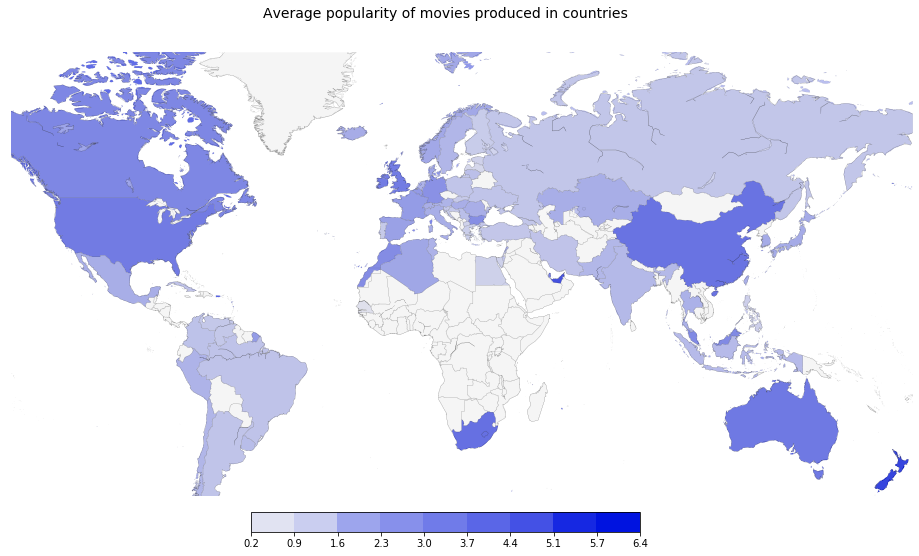

In [55]:
# the actual plot
shapefile = 'ne_10m_admin_0_countries_lakes'

# read shapes
fig, ax = plt.subplots(figsize = (18, 9))
fig.suptitle('Average popularity of movies produced in countries', 
             fontsize = 14, y = 0.95)

m = Basemap(projection = 'mill', llcrnrlon = -140, llcrnrlat = -60, urcrnrlon = 180, urcrnrlat = 80, 
            resolution = 'c')

m.drawmapboundary(fill_color = '#ffffff', linewidth = 0, ax = ax)
m.fillcontinents(color = '#dbdbdb', alpha = 0.25, lake_color = '#ffffff')
m.drawcoastlines(linewidth = 0.1, color = "black")
m.drawcountries(linewidth = 0.05, color = 'black')

# read shapes
m.readshapefile(shapefile, 'units', color = '#444444', linewidth = 0.05)

# define start and end colors
c_start = '#e1e3f2'
c_end = '#0013e0'

for info, shape in zip(m.units_info, m.units):
    country = info['NAME'] # some countries not found???
    
    if country in avg_popularity_countries:
        c_factor = (avg_popularity_countries[country] - min_pop)/(max_pop - min_pop)
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color_fader(c_start, c_end, c_factor))
        ax.add_collection(pc)
        
num_bound = 10
ax.axhspan(0, 1000 * 1800, facecolor = 'w', edgecolor = 'w', zorder = 2)
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
scheme = [color_fader(c_start, c_end, i/num_bound) for i in range(0,num_bound+1)]
cmap = mpl.colors.ListedColormap(scheme)
bins = np.linspace(min_pop, max_pop, num_bound)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap = cmap, ticks = bins, boundaries = bins, 
                               orientation = 'horizontal')
_ = cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

<font size="3">We have filtered out countries which have produced 10 or less movies since they can easily deceive the scale if they produced one block-buster (perhaps in collaboration with a country that has produced numerous movies). Countries that have produced a lot of movies are not the most popular on average. This is logical from the fact that they will produce many bad movies as well. Some countries are very popular, for example New Zealand which is probably due to the Lord of the Rings trilogy. Another popular country like South Africa might be due to safety and beautiful landscapes. Indeed, movies such as Avengers, District 9, Mad Max were (partly) set in South Africa. This is the same for the UAE, popular movies that are (partly) set there are Mission Impossible: Fallout, Star Trek Beyond, Furious 7, Star Wars: The Force Awaken among other popular movies.</font>

In [56]:
# we add a column of production countries per movie as a weight, the more the movie has popular production countries, the higher 
# the total weight of the movie
# compute weights
country_weight = country_name_stacked.value_counts(normalize = True)
country_name_weighted = country_name.replace(country_weight)
movies['production_countries_weight'] = country_name_weighted.sum(axis = 1)

5892 movies have 0 production countries
30233 movies have 1 production countries
4532 movies have 2 production countries
1374 movies have 3 production countries
433 movies have 4 production countries
139 movies have 5 production countries
33 movies have 6 production countries
12 movies have 7 production countries
5 movies have 8 production countries
6 movies have 9 production countries
2 movies have 11 production countries
1 movies have 12 production countries
1 movies have 15 production countries
1 movies have 25 production countries


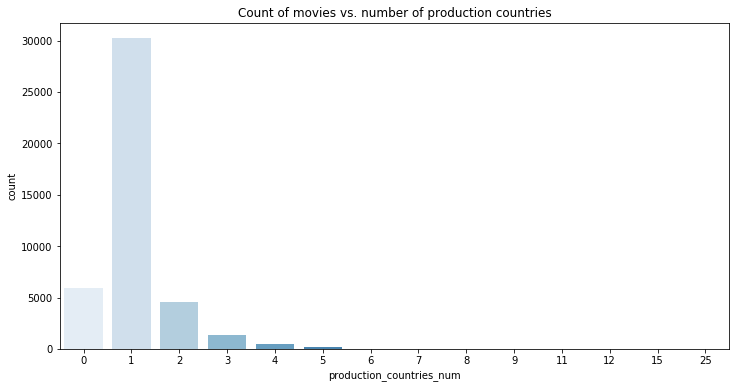

In [57]:
# we add column with number of production countries for each movie
country_name = movies.filter(regex = 'production_countries_name_.*')
movies['production_countries_num'] = country_name.count(axis = 1)
for i, c in movies['production_countries_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} production countries'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['production_countries_num'], 
                  palette = sns.color_palette("Blues", 8))
_ = ax.set_title('Count of movies vs. number of production countries')

<font size="3">Below another interesting plot of average budget among all movies per country. We assume the budget column is in American dollars and the same for all movies. </font>

In [58]:
# plot countries by average budget
# get average budget per country
budget_country = movies.filter(regex = '(production_countries_name_.*)|(budget)')
country_name = movies.filter(regex = 'production_countries_name_.*')
budget = movies.filter(regex = 'budget')
avg_budget_countries = {}
for country in country_name_value_counts.index:
    budget_this_country = budget_country[(budget_country[country_name.columns] == country).\
                                         any(axis = 1)]
    budget_this_country = budget_this_country[budget.columns]
    if len(budget_this_country) > 10: # keep small outliers out
        budget_this_country = budget_this_country[budget_this_country > 1e6] # keep only budget above a threshold
        avg_budget_this_country = budget_this_country.mean().values[0]
        avg_budget_countries[country] = avg_budget_this_country
    
max_budget = max(avg_budget_countries.values())
min_budget = min(avg_budget_countries.values())

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


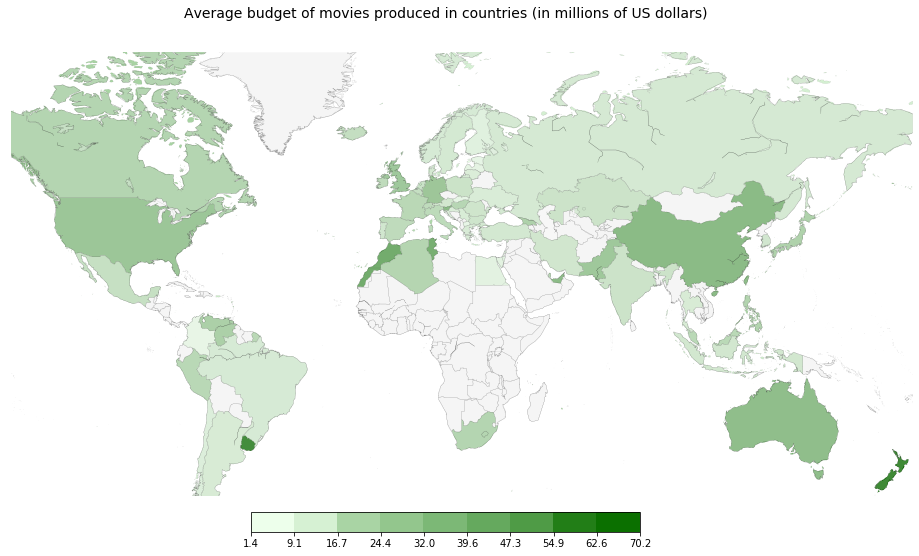

In [59]:
# the actual plot
shapefile = 'ne_10m_admin_0_countries_lakes'

# read shapes
fig, ax = plt.subplots(figsize = (18, 9))
fig.suptitle('Average budget of movies produced in countries (in millions of US dollars)', 
             fontsize = 14, y = 0.95)

m = Basemap(projection = 'mill', llcrnrlon = -140, llcrnrlat = -60, urcrnrlon = 180, urcrnrlat = 80, 
            resolution = 'c')

m.drawmapboundary(fill_color = '#ffffff', linewidth = 0, ax = ax)
m.fillcontinents(color = '#dbdbdb', alpha = 0.25, lake_color = '#ffffff')
m.drawcoastlines(linewidth = 0.1, color = "black")
m.drawcountries(linewidth = 0.05, color = 'black')

# read shapes
m.readshapefile(shapefile, 'units', color = '#444444', linewidth = 0.05)

# define start and end colors
c_start = '#edffeb'
c_end = '#0b7000'

for info, shape in zip(m.units_info, m.units):
    country = info['NAME'] # some countries not found???
    
    if country in avg_budget_countries and not pd.isnull(avg_budget_countries[country]):
        c_factor = (avg_budget_countries[country] - min_budget)/(max_budget - min_budget)
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color_fader(c_start, c_end, c_factor))
        ax.add_collection(pc)
        
num_bound = 10
ax.axhspan(0, 1000 * 1800, facecolor = 'w', edgecolor = 'w', zorder = 2)
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
scheme = [color_fader(c_start, c_end, i/num_bound) for i in range(0,num_bound+1)]
cmap = mpl.colors.ListedColormap(scheme)
bins = np.linspace(min_budget, max_budget, num_bound)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap = cmap, ticks = bins, boundaries = bins, 
                               orientation = 'horizontal')
_ = cb.ax.set_xticklabels([str(round(i/1e6, 1)) for i in bins])

In [60]:
# bin countries into continents and hot encode
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
country_continent_map = {}
for country in country_name_value_counts.index:
    try:
        continent = continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]
        country_continent_map[country] = continent
    except Exception as e:
        country_continent_map[country] = np.nan
        
# one-hot encode continents
for continent in continents.values():
    movies[continent] = 0
    
# go over all movies
for i, row in movies.iterrows():
    country_name = row.filter(regex = 'production_countries_name_.*')
    country_name = country_name.dropna()
    continent_name = country_name.replace(country_continent_map)
    continent_name = continent_name.dropna() # drop continents of nan, mapped in country_continent_map
    for c in continent_name:
        movies.at[i, c] = 1

In [61]:
movies

,adult,budget,id,original_language,original_title,popularity,revenue,runtime,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_name_0,genres_name_1,genres_name_2,genres_name_3,genres_name_4,genres_name_5,genres_name_6,genres_name_7,production_companies_name_0,production_companies_name_1,production_companies_name_2,production_companies_name_3,production_companies_name_4,production_companies_name_5,production_companies_name_6,production_companies_name_7,production_companies_name_8,production_companies_name_9,production_companies_name_10,production_companies_name_11,production_companies_name_12,production_companies_name_13,production_companies_name_14,production_companies_name_15,production_companies_name_16,production_companies_name_17,production_companies_name_18,production_companies_name_19,production_companies_name_20,production_companies_name_21,production_companies_name_22,production_companies_name_23,production_companies_name_24,production_companies_name_25,production_countries_name_0,production_countries_name_1,production_countries_name_2,production_countries_name_3,production_countries_name_4,production_countries_name_5,production_countries_name_6,production_countries_name_7,production_countries_name_8,production_countries_name_9,production_countries_name_10,production_countries_name_11,production_countries_name_12,production_countries_name_13,production_countries_name_14,production_countries_name_15,production_countries_name_16,production_countries_name_17,production_countries_name_18,production_countries_name_19,production_countries_name_20,production_countries_name_21,production_countries_name_22,production_countries_name_23,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_10,spoken_languages_iso_639_1_11,spoken_languages_name_11,spoken_languages_iso_639_1_12,spoken_languages_name_12,spoken_languages_iso_639_1_13,spoken_languages_name_13,spoken_languages_iso_639_1_14,spoken_languages_name_14,spoken_languages_iso_639_1_15,spoken_languages_name_15,spoken_languages_iso_639_1_16,spoken_languages_name_16,spoken_languages_iso_639_1_17,spoken_languages_name_17,spoken_languages_iso_639_1_18,spoken_languages_name_18,release_year,release_month,roi,revenue_norm_max,budget_norm_max,revenue_norm_mean,budget_norm_mean,genres_weight,genres_num,production_companies_num,production_companies_weight,production_countries_weight,production_countries_num,North America,South America,Asia,Australia,Africa,Europe
0,0,30000000.0,862,en,Toy Story,21.946943,373554033.0,81.0,Toy Story,0,7.7,5415.0,10194,Toy Story Collection,Animation,Comedy,Family,NaN,NaN,NaN,NaN,NaN,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,10,12.451801,1.000000,0.171429,27.268802,5.151801,0.194538,3,1,0.000795,0.426970,1,1,0,0,0,0,0
1,0,65000000.0,8844,en,Jumanji,17.015539,262797249.0,104.0,Jumanji,0,6.9,2413.0,-1,NaN,Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,NaN,TriStar Pictures,Teitler Film,Interscope Communications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of Am

## Analysis of spoken languages

In [62]:
# we can drop the iso certification name of spoken languages and re-econde later
language_iso = movies.filter(regex = 'spoken_languages_iso_.*')
movies = movies.drop(columns = language_iso.columns)

3683 movies have 0 spoken languages
31787 movies have 1 spoken languages
4976 movies have 2 spoken languages
1520 movies have 3 spoken languages
470 movies have 4 spoken languages
154 movies have 5 spoken languages
48 movies have 6 spoken languages
12 movies have 7 spoken languages
7 movies have 8 spoken languages
3 movies have 9 spoken languages
1 movies have 10 spoken languages
1 movies have 11 spoken languages
1 movies have 13 spoken languages
1 movies have 18 spoken languages


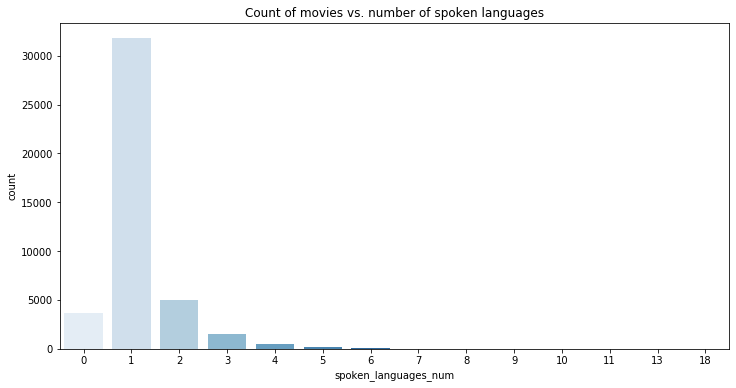

In [63]:
# we add column with number of spoken languages for each movie
language_name = movies.filter(regex = 'spoken_languages_name_.*')
movies['spoken_languages_num'] = language_name.count(axis = 1)
for i, c in movies['spoken_languages_num'].value_counts().sort_index().iteritems():
    print('{} movies have {} spoken languages'.format(c, i))
# some nice plot
fig, ax = plt.subplots(figsize = (12, 6))
_ = sns.countplot(movies['spoken_languages_num'], 
                  palette = sns.color_palette("Blues", 8))
_ = ax.set_title('Count of movies vs. number of spoken languages')

In [64]:
# add column with weighted spoken languages
language_name = movies.filter(regex = 'spoken_languages_name_.*')
language_name_stacked = language_name.stack().reset_index(drop = True)
language_weight = language_name_stacked.value_counts(normalize = True)
language_name_weighted = language_name.replace(language_weight)
movies['spoken_languages_weight'] = language_name_weighted.sum(axis = 1)

## Runtime analysis

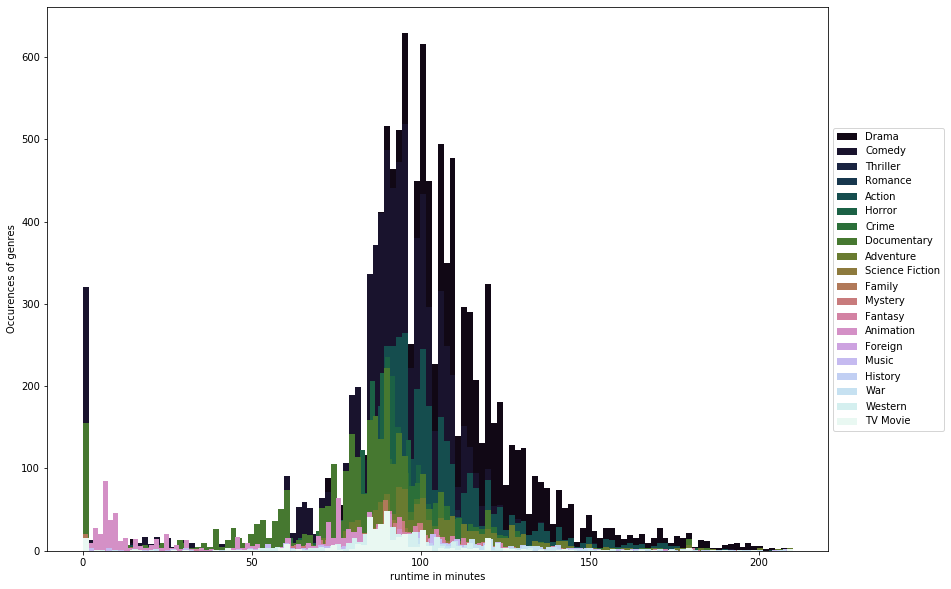

In [65]:
# plot runtime by removing outliers with z-score
fig, ax = plt.subplots(figsize = (14, 10))
x = 'runtime'
df_toplot = movies[(np.abs(stats.zscore(movies[[x]])) < 3).all(axis=1)]

# group movies by genres in genres_name_0 column and in order of most popular genre to least popular
grouper = {genre: df for genre, df in df_toplot.groupby('genres_name_0', sort = False)}
# sort the grouper
grouper = {genre : grouper[genre] for genre in genres_name_stacked.value_counts().index}
for i, (genre, df) in enumerate(grouper.items()):
    ax.hist(df[x], 120, stacked = True, color = genres_palette[i], label = genre,
           range = (df[x].min(), df[x].max()))
_ = ax.legend(bbox_to_anchor = (1, 0.5), loc = 'center left')
_ = ax.set_xlabel(x + ' in minutes')
_ = ax.set_ylabel('Occurences of genres')

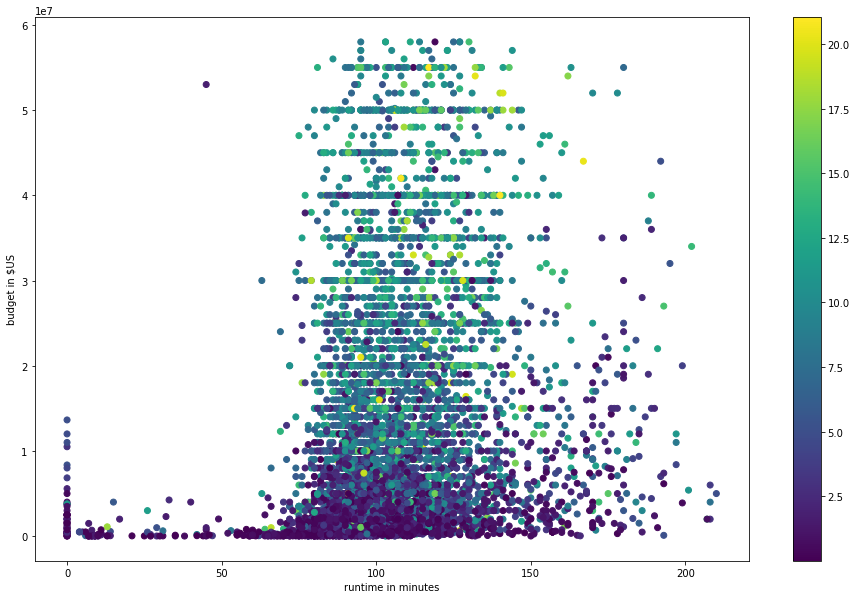

In [66]:
# plot budget vs. runtime (vs. popularity?)
fig, ax = plt.subplots(figsize = (16, 10))
x = 'runtime'
y = 'budget'
z = 'popularity'
df_toplot = movies[(np.abs(stats.zscore(movies[[x, y, z]])) < 3).all(axis=1)]
# filter budget 
df_toplot = df_toplot[df_toplot[y] > 1e4] 

chart = ax.scatter(df_toplot[x], df_toplot[y], c = df_toplot[z],
                   cmap='viridis')
#ax.set_yscale('log')
ax.set_ylabel(y + ' in $US')
ax.set_xlabel(x + ' in minutes')
_ = fig.colorbar(chart, ax = ax)


## Budget and revenue analysis

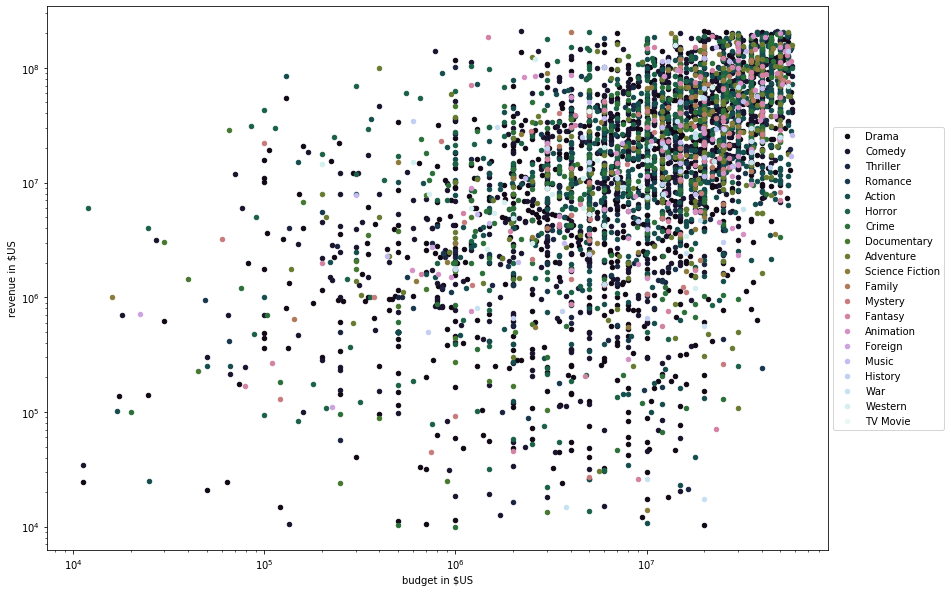

In [67]:
# plot budget vs revenue by removing outliers with z-score
fig, ax = plt.subplots(figsize = (14, 10))
df_toplot = movies[(np.abs(stats.zscore(movies[['revenue', 'budget']])) < 3).all(axis=1)]
# filter revenue and budget above 0?
df_toplot = df_toplot[df_toplot['budget'] > 1e4] 
df_toplot = df_toplot[df_toplot['revenue'] > 1e4]

# group movies by genres in genres_name_0 column and in order of most popular genre to least popular
grouper = {genre: df for genre, df in df_toplot.groupby('genres_name_0', sort = False)}
# sort the grouper
grouper = {genre : grouper[genre] for genre in genres_name_stacked.value_counts().index}
for i, (genre, df) in enumerate(grouper.items()):
    df.plot.scatter('budget', 'revenue', label = genre, color = genres_palette[i], ax = ax)
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('budget in $US')
ax.set_ylabel('revenue in $US')
_ = ax.legend(bbox_to_anchor = (1, 0.5), loc = 'center left')

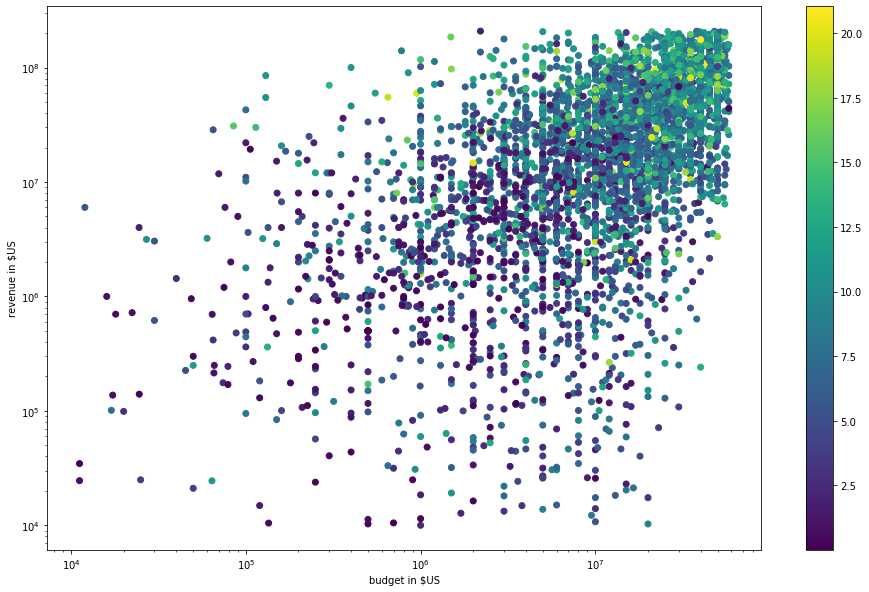

In [68]:
# plot budget vs revenue vs. popularity by removing outliers with z-score
fig, ax = plt.subplots(figsize = (16, 10))
x = 'budget'
y = 'revenue'
z = 'popularity' # try vote_count as well
df_toplot = movies[(np.abs(stats.zscore(movies[[x, y, z]])) < 3).all(axis=1)]
# filter revenue and budget above 0?
df_toplot = df_toplot[df_toplot[x] > 1e4] 
df_toplot = df_toplot[df_toplot[y] > 1e4]

chart = ax.scatter(df_toplot[x], df_toplot[y], c = df_toplot[z],
                   cmap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(x + ' in $US')
ax.set_ylabel(y + ' in $US')
#fig.suptitle('{} vs. {} vs. {}'.format(z, y, x))
_ = fig.colorbar(chart, ax = ax)

Text(0, 0.5, 'mean_values in $US')

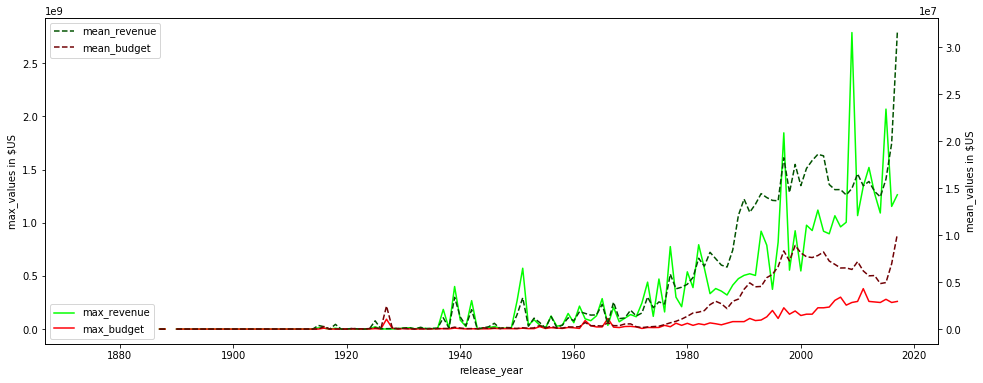

In [69]:
# plot mean budget vs mean revenue and max budget vs. max revenue per year
df_toplot = pd.DataFrame(columns = ['max_budget', 'max_revenue', 'mean_budget', 'mean_revenue'],
                        data = np.nan, 
                         index = range(movies['release_year'].min(), movies['release_year'].max()+1))
for year, df in movies.groupby('release_year'):
    df_toplot.at[year, 'max_budget'] = df['budget'].max()
    df_toplot.at[year, 'max_revenue'] = df['revenue'].max()
    df_toplot.at[year, 'mean_budget'] = df['budget'].mean()
    df_toplot.at[year, 'mean_revenue'] = df['revenue'].mean()
    
fig, ax = plt.subplots(figsize = (16, 6))

df_toplot['max_revenue'].plot(ax = ax, color = '#03ff00', label = 'max_revenue')
ax_bis = ax.twinx()
df_toplot['mean_revenue'].plot(ax = ax_bis, color = '#015200', label = 'mean_revenue', linestyle = '--')

df_toplot['max_budget'].plot(ax = ax, color = '#ff0008', label = 'max_budget')
df_toplot['mean_budget'].plot(ax = ax_bis, color = '#700004', label = 'mean_budget', linestyle = '--')

ax.legend(loc = 3)
ax_bis.legend(loc=0)

ax.set_xlabel('release_year')
ax.set_ylabel('max_values in $US')
ax_bis.set_ylabel('mean_values in $US')

<font size="3">We see that the taking the maximum for normalising the ROI leads to high variances compared to the mean series.</font>

## Popularity and vote count analysis

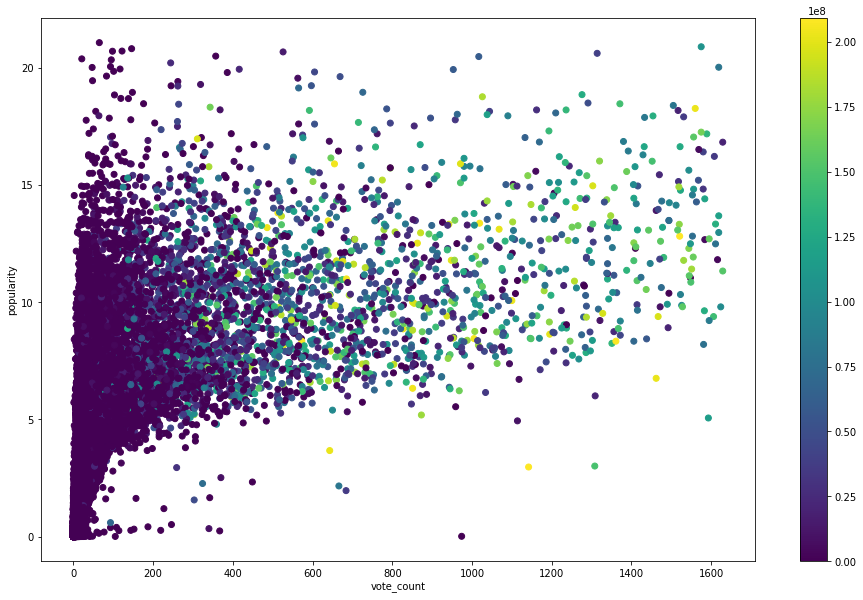

In [70]:
# plot popularity vs vote count vs. budget by removing outliers with z-score
fig, ax = plt.subplots(figsize = (16, 10))
x = 'vote_count'
y = 'popularity'
z = 'revenue' # try other columns
df_toplot = movies[(np.abs(stats.zscore(movies[[x, y, z]])) < 3).all(axis=1)]

chart = ax.scatter(df_toplot[x], df_toplot[y], c = df_toplot[z],
                   cmap='viridis')
ax.set_xlabel(x)
ax.set_ylabel(y)
#fig.suptitle('{} vs. {} vs. {}'.format(z, y, x))
_ = fig.colorbar(chart, ax = ax)                            

## Collection analysis

In [71]:
# create a new column belongs to collection (True 1, False 0)
movies['belongs_to_collection'] = movies['belongs_to_collection_name'].notnull().astype('int')
movies = movies.drop(columns = 'belongs_to_collection_id')

# Drop non-numeric values for ML part (next)

In [85]:
to_export = movies.select_dtypes(exclude = 'object')

# Save EDA data

In [86]:
to_export.to_csv('movies_metadata_eda.csv', index = False)